In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn import metrics

from keras.wrappers.scikit_learn import KerasRegressor
#from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# load a saved model
from keras.models import load_model

from matplotlib import pyplot

import os
%matplotlib inline
print(os.listdir("../dados/input"))


Using TensorFlow backend.


['teste.csv', 'todos.csv', 'todos2.csv', 'todos2.ods', 'treino.csv']


In [2]:
original_data = pd.read_csv('../dados/input/todos.csv')

In [3]:
n_values = len(original_data.iloc[:,1])
n_test = 5
n_train = n_values - n_test
n_train_start = n_test+1
date = 0
max_temp = 3
sales = 21

In [4]:
X_train = original_data.iloc[n_train_start : n_values, max_temp : sales ]

In [5]:
X_train.values

array([[ 30.2 ,  74.25,   0.  , ..., 138.  , 188.  , 165.  ],
       [ 28.3 ,  70.75,   1.  , ..., 188.  , 165.  , 110.  ],
       [ 21.1 ,  85.  ,   0.  , ..., 165.  , 110.  , 355.  ],
       ...,
       [ 24.1 ,  88.25,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [ 20.3 ,  78.75,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [ 25.2 ,  83.5 ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [6]:
Y_train = original_data.iloc[n_train_start:n_values, sales].values

In [7]:
Y_train

array([203, 323,  49, 138, 188, 165, 110, 355, 387, 411, 287, 216, 440,
       422, 432, 310, 238, 432, 407, 424, 316, 268, 409, 393, 384, 321,
       247, 416, 413, 432, 312, 417, 402, 381, 337, 288, 429, 387, 495,
       337, 243, 485, 415, 465, 358, 260, 460, 436, 467, 331, 261, 473,
       407, 476, 305,  20,  40,  68, 110,  18, 204, 216, 363,   0, 256,
       412,  73, 469, 391,   0, 439, 442, 468, 382, 353, 425, 453, 247,
       261, 309, 496, 456, 523, 426,  68, 455, 507, 402, 352, 464, 442,
       490, 413, 319, 529, 453, 503, 439, 344, 532, 457, 335, 512, 481,
       533, 460, 320, 526, 488, 547, 448, 349, 532, 491, 572, 443, 398,
       568, 465, 551, 486, 424, 398, 520, 463, 389, 525, 490, 553, 340,
       544, 500, 548, 413, 378, 514, 502, 502, 430, 308, 461, 443, 470,
       446,  42,  70,  64, 101, 178, 215, 263, 145, 295, 351, 387, 294,
       194, 460, 363, 437, 314, 212, 396, 336, 427, 312, 218, 407, 428,
       306, 220, 367, 352, 463, 320, 306, 451, 353,  95, 149, 20

In [8]:
X_test = original_data.iloc[1:n_test+1, max_temp : sales].values
X_test

array([[ 28.  ,  72.75,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   1.  , 293.  , 263.  , 402.  ,
        382.  , 203.  ],
       [ 21.  ,  82.75,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   3.  , 263.  , 402.  , 382.  ,
        203.  , 323.  ],
       [ 25.4 ,  85.5 ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   3.  ,   1.  , 402.  , 382.  , 203.  ,
        323.  ,  49.  ],
       [ 21.4 ,  91.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   1.  , 382.  , 203.  , 323.  ,
         49.  , 138.  ],
       [ 19.5 ,  88.75,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   1.  , 203.  , 323.  ,  49.  ,
        138.  , 188.  ]])

In [9]:
Y_test = original_data.iloc[1:n_test+1, sales].values
Y_test

array([437, 293, 263, 402, 382], dtype=int64)

In [10]:
scaler = StandardScaler().fit(X_train)
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [11]:
early_stopping_monitor = EarlyStopping(
                                        monitor = 'mean_squared_error', 
                                        mode = 'min',
                                        min_delta=1,
                                        verbose=0,
                                        patience = 500
)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='mean_squared_error', mode='min', verbose=0, save_best_only=True)

In [12]:
model1 = Sequential()
model1.add(
            Dense(
                    9,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model1.add(
            Dense(1)
)
model1.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

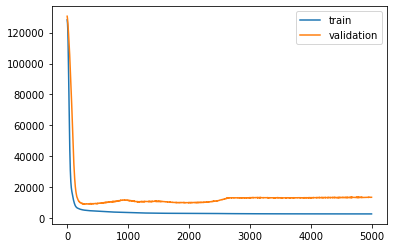

In [13]:
model1_history = model1.fit(
            standardized_X_train,
            Y_train,
            batch_size=5,
            epochs=5000,
            #validation_split=0.3,
            validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)

saved_model1 = load_model('best_model.h5')

pyplot.plot(model1_history.history['loss'], label='train')
pyplot.plot(model1_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [14]:
model2 = Sequential()

model2.add(
            Dense(
                    standardized_X_train.shape[1],
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model2.add(
            Dense(
                    9,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model2.add(
            Dense(1)
)
model2.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

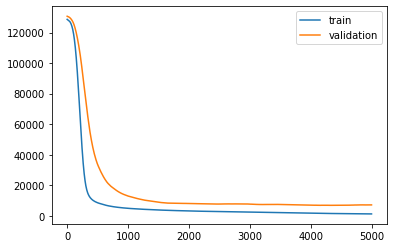

In [15]:
model2_history = model2.fit(
            standardized_X_train,
            Y_train,
            batch_size=148,
            epochs=5000,
            #validation_split=0.3,
            validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)
saved_model2 = load_model('best_model.h5')

pyplot.plot(model2_history.history['loss'], label='train')
pyplot.plot(model2_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [16]:
model3 = Sequential()
model3.add(
            Dense(
                    standardized_X_train.shape[1],
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model3.add(
            Dense(
                    10,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model3.add(
            Dense(
                    5,
                    activation='relu',
                    input_dim=10
            )
)
model3.add(
            Dense(1)
)
model3.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

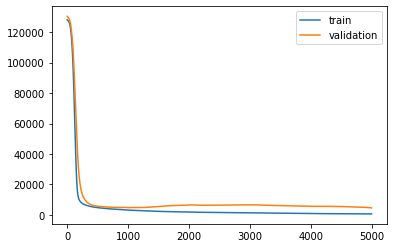

In [17]:
model3_history = model3.fit(
            standardized_X_train,
            Y_train,
            batch_size=148,
            epochs=5000,
            #validation_split=0.3,
            validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)

saved_model3 = load_model('best_model.h5')

pyplot.plot(model3_history.history['loss'], label='train')
pyplot.plot(model3_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [18]:
predictions1 = saved_model1.predict(standardized_X_test)
predictions2 = saved_model2.predict(standardized_X_test)
predictions3 = saved_model3.predict(standardized_X_test)

# evaluate the model
train_acc1 = saved_model1.evaluate(standardized_X_train, Y_train)
train_acc2 = saved_model2.evaluate(standardized_X_train, Y_train)
train_acc3 = saved_model3.evaluate(standardized_X_train, Y_train)
test_acc = saved_model3.evaluate(standardized_X_test, Y_test)

print(saved_model1.metrics_names)
print('Model 1: ') 
print(train_acc1)
print('Model 2: ') 
print(train_acc2)
print('Model 3: ') 
print(train_acc3)
print('Test: ') 
print(test_acc)

5/5 [==============================] - 0s 200us/step
['loss', 'acc', 'mean_squared_error', 'mean_absolute_error']
Model 1: 
[2892.821148598031, 0.003424657534246575, 2892.821148598031, 37.77284460198389]
Model 2: 
[1240.593455693493, 0.023972602739726026, 1240.593455693493, 23.539098452215324]
Model 3: 
[604.8145149962543, 0.030821917808219176, 604.8145149962543, 17.0634047625816]
Test: 
[4604.94140625, 0.0, 4604.94140625, 57.852699279785156]


Text(0, 0.5, 'Model 3 Predicted Y')

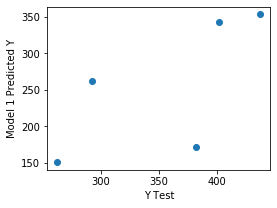

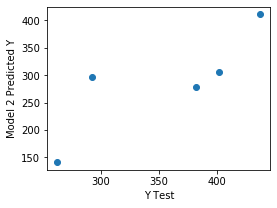

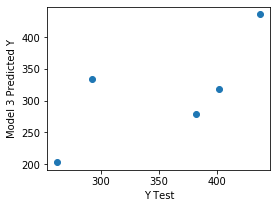

In [19]:
plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions1[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 1 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions2[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 2 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions3[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 3 Predicted Y')

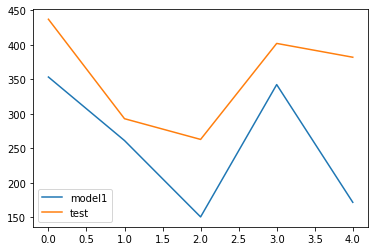

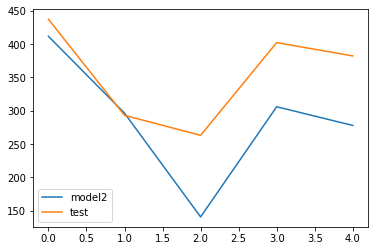

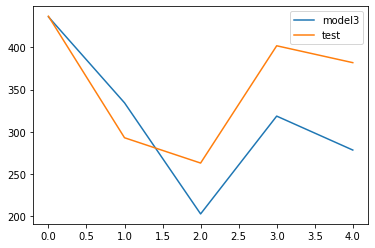

In [20]:
pyplot.plot(predictions1, label='model1')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions2, label='model2')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions3, label='model3')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()